In [2]:
import numpy as np
import pandas as pd
from implementation.biclustering_ import Biclustering
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

## Importing the data 
In this notebook, we will be exploring the [Gene Expression Data](https://arep.med.harvard.edu/biclustering/yeast.matrix) dataset. Along with the implementation of the biclustering algorithm presented in the paper [Biclustering of Expression Data](https://arep.med.harvard.edu/biclustering/). 
The notebook in divided into three sections:
#### Processing & visualizing the data
In this section, we will be processing and visualizing the data from the yeast matrix dataset associated to the work on this the clustering model was trained.
#### Running the biclustering model
In this section, we will be running the biclustering model on the chosen data. The training will be preformed using CROSS-VALIDATION in order to keep track of the generalization error.
### Visulaizing the results & comparison to the original biclusters
This section will be dedicated to visualizing the results of the biclustering model to the previous biclusters obtrained from the previous work in order to evaluate its accuracy.

# Exploring the data set - Yeast matrix

In [2]:
raw_data = pd.read_csv('./data/yeast_matrix.csv')

# extract & convert all the columns
data = pd.DataFrame(raw_data)

# converting the types acoordingly
df =data.astype('float')


### Heatmap
Exploring the correlations between the features to better understand how the features are correlated.

<Axes: >

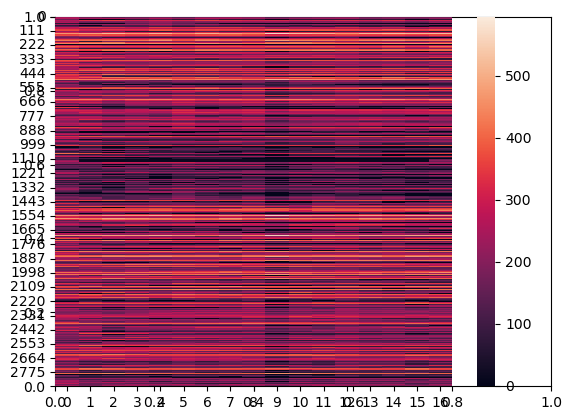

In [3]:
fig, ax = plt.subplots()
ax = plt.axes()
sns.heatmap(df,ax=ax, xticklabels=np.arange(17))


### Running the CC algorithm & Result analysis

In [38]:
# extracting a test set
# timing the execution for 5 biclusters 

test_set = data[:2000].astype('float').to_numpy()
results = {}
sigma = 150
alpha =1.2

experiements = [5]

for sample in tqdm(range(len(experiements))):
    start_time = time.time()
    exp = Biclustering(sigma, alpha, nb_biclusters=experiements[sample])
    exp.run(test_set)
    print(f"Time taken to generated {experiements[sample]} biclusters : {time.time() - start_time}")
    results[f"{experiements[sample]}"] = exp

  


100%|██████████| 1/1 [00:02<00:00,  2.14s/it]

Time taken to generated 5 biclusters : 2.143205165863037


### Evaluating the results of the previous experiments

Once the biclusters has been generated. We will evaluate the number of `rows`, `columns` and the `msr` values of every one of them.

####

NameError: name 'results' is not defined

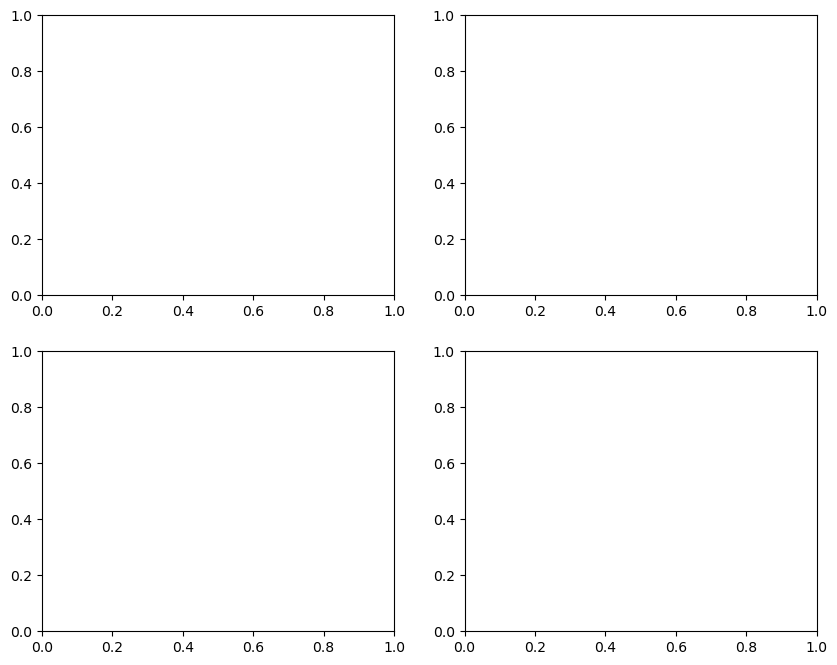

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
exp  = results["30"]
print('Rows \t|Columns\t|mrs score\t\n')
for bicluster in exp.biclusters:
    print(f"{bicluster.rows}\t|{bicluster.columns}\t|{bicluster.msr_score}\n")


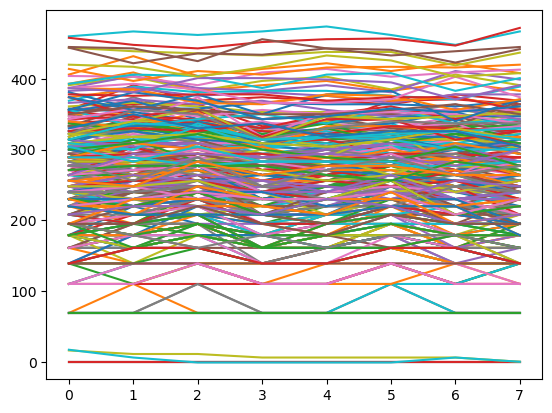

In [41]:
data_n = df.to_numpy()
exp1 = results["5"]
b2_rows = exp1.biclusters[1].rows
b2_cols = exp1.biclusters[1].columns

data1 = data_n[b2_rows]
data1 = data1[:,b2_cols]

for i in range(int(data1.shape[0])):
    plt.plot(data1[i])
plt.show()


In [5]:
b2_rows = exp1.biclusters[1].rows
b2_cols = exp1.biclusters[3].columns

data_b2 = data_n[b2_rows]
data_b2 = data_b2[:,b2_cols]


sns.heatmap(data_b2)


NameError: name 'exp1' is not defined

In [8]:
start_time = time.time()
exp2 = Biclustering(sigma= 1.2, alpha=0.3, nb_biclusters=20)
exp2.run(test_set)
print(f"Time taken to generated 20 biclusters : {time.time() - start_time}")

Row and column evolution
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 498  537  543  545  546  550  558  559  560  562  566  569  573  580
  589  590  593  598  600  601  605  608  609  613  616  617  620  625
  627  629  630  633  636  637  638  643  644  647  648  651  652  653
  654  655  659  660  661  662  666  673  679  680  691  692  693  694
  695  698  699  707  710  711  715  726  728  729  730  731  733  734
  737  739  740  741  744  745  751  753  761  762  763  764  767  769
  775  776  777  779  780  786  789  790  792  794  799  801  803  804
  805  808  811  813  818  819  821  825  826  830  835  837  839  840
  841  842  843  844  845  848  854  867  868  869  872  875  883  890
  892  893  896  897  900  904  907  910  911  914  917  918  929  932
  936  939  942  947  952  954  959  962  964  968  970  973  977  978
  986  999 1000 1003 1004 1005 1006 1008 1010 1012 1017 1018 1024 1025
 1028 1029 1030 1032 1035 1039 1040 1047 1049 1055 1060 1061 1077 1083

In [9]:
start_time = time.time()
exp3 = Biclustering(sigma= 1.2, alpha=0.3, nb_biclusters=30)
exp3.run(test_set)
print(f"Time taken to generated 30 biclusters : {time.time() - start_time}")

Row and column evolution
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 495  523  666  780  830  831  833  834  835  836  837  839  840  841
  842  843  844  847  848  851  852  854  859  863  866  867  868  869
  872  874  875  878  880  881  883  885  886  890  892  893  894  896
  897  899  900  901  904  905  907  909  910  911  914  915  916  917
  918  925  929  932  934  936  937  938  939  942  943  947  948  952
  953  954  959  962  963  964  967  968  970  973  977  978  980  986
  988  989  993  995  997  998  999 1000 1002 1003 1004 1005 1006 1008
 1009 1010 1012 1014 1015 1017 1018 1019 1023 1024 1025 1028 1029 1030
 1032 1035 1039 1040 1041 1043 1047 1049 1055 1060 1061 1062 1069 1071
 1077 1081 1083 1087 1088 1093 1094 1095 1097 1101 1102 1104 1105 1108
 1112 1131 1134 1136 1138 1139 1140 1145 1148 1152 1154 1155 1156 1158
 1159 1163 1164 1165 1172 1181 1184 1186 1187 1189 1190 1191 1196 1197
 1198 1199 1202 1206 1208 1211 1213 1215 1218 1220 1221 1222 1224 1230
 1

In [39]:
df1 = pd.read_csv("./data/biclusters_yeast_data.csv", names=['rows', "columns", 'msr', 'index_rows', 'index_cols'])
df.sort_values(by='msr', ascending=False)

,rows,columns,msr,index_rows,index_cols
93,4,11,293.762,0 1 2 5 7 8 9 10 11 13 15,115 200 1116 2473
92,3,15,283.451,0 1 2 3 4 5 6 7 8 10 11 12 ...,277 769 2708
74,4,13,279.163,0 1 2 3 4 6 7 9 10 13 14 15 16,389 779 833 1430
62,4,17,278.127,0 1 2 3 4 5 6 7 8 9 10 11 ...,457 857 858 2872
0,689,17,273.921,0 1 2 3 4 5 6 7 8 9 10 11 ...,11 17 19 22 24 26 27 36 37 3...
...,...,...,...,...,...
54,139,6,144.774,6 8 9 11 12 15,6 47 62 68 70 76 88 104 137 138...
73,3,17,140.522,0 1 2 3 4 5 6 7 8 9 10 11 ...,1615 2709 2730
72,18,7,134.475,3 4 5 6 8 11 16,14 223 416 1014 1027 1034 1147 1180 1197 131...
89,989,5,121.592,4 6 13 14 16,-2 6 7 8 16 22 24 26 31- 3...


In [ ]:
df2 = pd.read_csv("./experiments/exp-1.csv", names=['rows', "columns", 'msr', 'index_rows', 'index_cols'])
